In [1]:
import datetime
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv('F:/Practice/2025/July/Files/eda_label_encoding_dataset.csv')
df.head()

,date,number_of_strikes,center_point_geom
0,2016-08-05,16,POINT(-101.5 24.7)
1,2016-08-05,16,POINT(-85 34.3)
2,2016-08-05,16,POINT(-89 41.4)
3,2016-08-05,16,POINT(-89.8 30.7)
4,2016-08-05,16,POINT(-86.2 37.9)


In [3]:
#create a new dataframe with the number of strikes per month
df['date'] = pd.to_datetime(df['date'])
df['month'] = df['date'].dt.month_name().str.slice(stop=3)  # Get the first three letters of the month name

#make the month name categorical. So they are in calendar instead of alphabetical order when plotting them
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
df['month'] = pd.Categorical(df['month'], categories = months, ordered=True)
df['year'] = df['date'].dt.strftime('%Y')
df_by_month = df.groupby(['year', 'month']).sum(numeric_only=True).reset_index()
df_by_month.head()

C:\Users\Rashidul_Islam\AppData\Local\Temp\ipykernel_1936\3660346146.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_by_month = df.groupby(['year', 'month']).sum(numeric_only=True).reset_index()


,year,month,number_of_strikes
0,2016,Jan,313595
1,2016,Feb,312676
2,2016,Mar,2057527
3,2016,Apr,2636427
4,2016,May,5800500


In [4]:
df_by_month['strike_level'] = pd.qcut(
    df_by_month['number_of_strikes'],
    4,
    labels=['Mild', 'Scattered', 'Heavy', 'Severe']
    )
df_by_month.head()

,year,month,number_of_strikes,strike_level
0,2016,Jan,313595,Mild
1,2016,Feb,312676,Mild
2,2016,Mar,2057527,Scattered
3,2016,Apr,2636427,Heavy
4,2016,May,5800500,Severe


In [5]:
#Assain numerical values to each strike level
df_by_month['strike_level_code'] = df_by_month['strike_level'].cat.codes
df_by_month.head()

,year,month,number_of_strikes,strike_level,strike_level_code
0,2016,Jan,313595,Mild,0
1,2016,Feb,312676,Mild,0
2,2016,Mar,2057527,Scattered,1
3,2016,Apr,2636427,Heavy,2
4,2016,May,5800500,Severe,3


In [7]:
pd.get_dummies(df_by_month['strike_level'], dtype='int')


,Mild,Scattered,Heavy,Severe
0,1,0,0,0
1,1,0,0,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,1
5,0,0,0,1
6,0,0,0,1
7,0,0,0,1
8,0,0,1,0
9,0,1,0,0


In [11]:
#create numerical dummies for the strike 
df_by_month_plot = df_by_month.pivot(index='year', columns='month', values='strike_level_code')
df_by_month_plot.head()

month,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
year,,,,,,,,,,,,
2016,0,0,1,2,3,3,3,3,2,1,0,0
2017,1,0,1,2,2,2,3,3,2,1,0,0
2018,1,2,1,1,2,3,3,3,2,1,0,0


In [12]:
df_by_month_plot = df_by_month.pivot(index='year', columns='month', values='strike_level_code')
df_by_month_plot.head()

month,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
year,,,,,,,,,,,,
2016,0,0,1,2,3,3,3,3,2,1,0,0
2017,1,0,1,2,2,2,3,3,2,1,0,0
2018,1,2,1,1,2,3,3,3,2,1,0,0


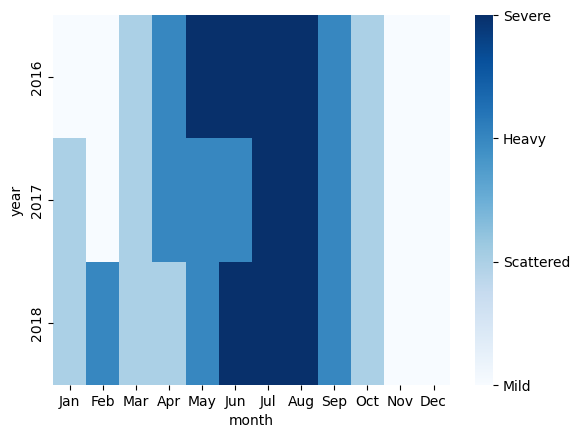

In [15]:
#make a heatmap showing which month over the years had the most severe liting strikes
ax = sns.heatmap(df_by_month_plot, cmap='Blues')
colorbar = ax.collections[0].colorbar
colorbar.set_ticks([0, 1, 2, 3])
colorbar.set_ticklabels(['Mild', 'Scattered', 'Heavy', 'Severe'])
plt.show()